<a href="https://colab.research.google.com/github/Rit-ctrl/Pattern-Recognition_2021/blob/main/q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1. Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2).

ω1 = [1,6; 3,4; 3,8; 5,6]

ω2 = [3,0; 1,-2;3,-4;5,-2]



In [9]:

w1 = [[1,6], [3,4], [3,8], [5,6]]

w2 = [[3,0], [1,-2],[3,-4],[5,-2]]

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [12]:
w1=pd.DataFrame(data=w1,columns=['x','y'])
w2=pd.DataFrame(data=w2,columns=['x','y'])

#converting to pandas dataframe for ease of access and plotting

Class w1 
    x  y
0  1  6
1  3  4
2  3  8
3  5  6


Class w2 
    x  y
0  3  0
1  1 -2
2  3 -4
3  5 -2




Text(0.5, 1.0, '2 classes ')

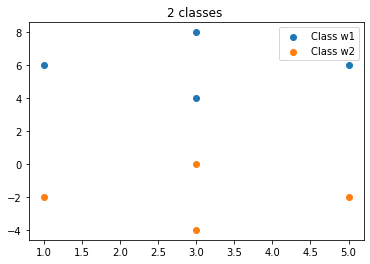

In [26]:
print("Class w1 \n",w1)
print("\n")
print("Class w2 \n",w2)
print("\n")

plt.scatter(x=w1['x'],y=w1['y'],label="Class w1")
plt.scatter(x=w2['x'],y=w2['y'],label="Class w2")
plt.legend()
plt.title("2 classes ")

## Calc mean and covariance

In [60]:
#mean
w1_mean=w1.mean().to_numpy()
w2_mean=w2.mean().to_numpy()

print(w1_mean)
print(w2_mean)

[3. 6.]
[ 3. -2.]


In [62]:
#covariance

w1_cov=w1.cov().to_numpy()
w2_cov=w2.cov().to_numpy()

print(w1_cov)
print(w2_cov)

[[2.66666667 0.        ]
 [0.         2.66666667]]
[[2.66666667 0.        ]
 [0.         2.66666667]]


## Defining discriminant function

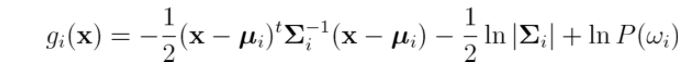

In [33]:
def gi(x,mean,cov,p_w):
  t1=-0.5 *(np.subtract(x,mean)).T @ np.linalg.inv(cov) @ np.subtract(x,mean)
  t2=-0.5 *np.log(np.linalg.det(cov))
  t3=np.log(p_w)
  return t1+t2+t3
 

In [34]:
from sympy import Matrix, solve, symbols

In [35]:
x,y=symbols('x y')

In [75]:
M=Matrix([x,y])

In [76]:
M

Matrix([
[x],
[y]])

Matrix([
[x - 3.0],
[y - 6.0]])

In [90]:
g1=gi(M,w1_mean.reshape(2,1),w1_cov,0.5)
g2=gi(M,w2_mean.reshape(2,1),w2_cov,0.5)

In [102]:
g1

array([[(0.5625 - 0.1875*x)*(x - 3.0) + (1.125 - 0.1875*y)*(y - 6.0) - 1.67397643357167]],
      dtype=object)

In [103]:
g2

array([[(0.5625 - 0.1875*x)*(x - 3.0) + (-0.1875*y - 0.375)*(y + 2.0) - 1.67397643357167]],
      dtype=object)

In [104]:
g=np.subtract(g1[0][0],g2[0][0])

In [105]:
print(g)

(1.125 - 0.1875*y)*(y - 6.0) - (-0.1875*y - 0.375)*(y + 2.0)


In [106]:
solve(g,(x,y))

[(x, 2.00000000000000)]